<a href="https://colab.research.google.com/github/RocioAguiar/ClasificacionDeImagenes/blob/Master/Mi_Primer_Clasificador_de_Im%C3%A1genes_%F0%9F%93%B8_%F0%9F%8F%9E%EF%B8%8F_con_Python_y_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este proyecto haré **Mi Primer Clasificador de Imagenes  📸 🏞️ con Python y Tensorflor**.  

Usarémos **60,000** imágenes para entrenar el modelo y **10,000** para probar que funcione bien.

Servirá para practicar varios conceptos importantes sobre redes neuronales. ¡Aquí vamos! =D

fuente del ejercicio: https://www.youtube.com/watch?v=j6eGHROLKP8&list=PLZ8REt5zt2Pn0vfJjTAPaDVSACDvnuGiG&index=2



📚📚 Primero importaré las librerías que requiero:

In [47]:
import tensorflow as tf
import tensorflow_datasets as tfds #Esta librería nos permitirá descargar facilmente el Set de Datos
import matplotlib.pyplot as plt
import math

 📥 🔢 Luego, voy a descargar el Set de Datos con el que voy a trabajar.

Set de Datos de Fashin MNIST de Zalando 👕👖🧣🧤🧥🧦👗👘🥻🩱🩲🩳👙👚:

In [48]:
datos,metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [49]:
#Voy a imprimir los metadatos para ver qué trae el Set de Datos
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    =

In [51]:
#Separarémos los datos en 2 conjuntos separados para trabajar con ellos
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [52]:
nombres_clases = metadatos.features['label'].names

In [53]:
nombres_clases #Aquí nos va a mostrar desde el índice 0 al 09 los nombres

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Ahora vamos a normalizar los datos. Es decir, hacer que los datos se muestren entre 0 y 1.

In [54]:
#Vamos a pasar de 0-224 a 0-1
#Esto hace que la Red Neuronal aprenda mejor y más rápido
def normalizar(imagenes,etiquetas):
  imagenes=tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aquí lo pasa de 0-255 a 0-1
  return imagenes,etiquetas

In [55]:
#Normalizamos los datos de entrenamiento y pruebas con la función que hicimos
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

In [56]:
#Agregamos a caché (usar memoria en lugar de disco, logra un entrenamiento más rápido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

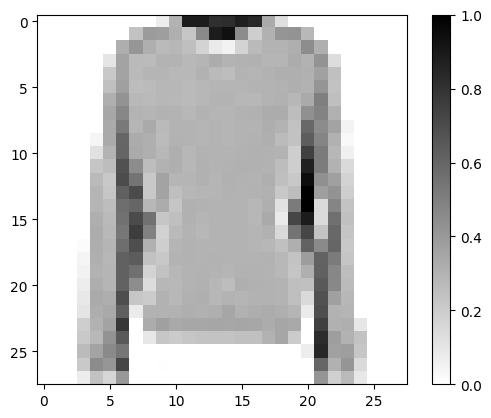

In [57]:
#Mostrar una imagen de los datos de pruebas, de momento mostrarémos la primera imagen
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
  imagen = imagen.numpy().reshape((28,28)) #Redimensionar

#Dibujar
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


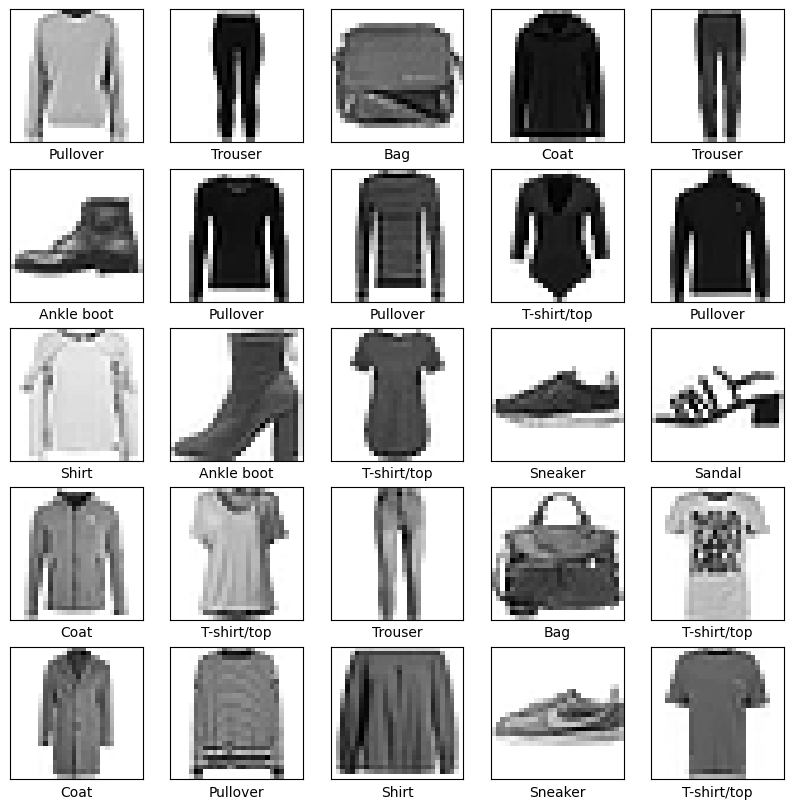

In [58]:
#Dibujar más
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate (datos_entrenamiento.take(25)):
  imagen=imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen,cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [59]:
#Crear el modelo
modelo = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28,1)),
      tf.keras.layers.Dense(50, activation=tf.nn.relu), #CapaOculta con 50 neuronas
      tf.keras.layers.Dense(50, activation=tf.nn.relu), #CapaOculta con 50 neuronas
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
 ])

In [60]:
#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [61]:
#Los numeros de datos en entrenamiento y pruebas (60,000 y 10,000)
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

In [62]:
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [63]:
#El trabajo por lotes permite que entrenamientos con gran cantidad de datos se haga de manera más eficiente
TAMANO_LOTE = 32

#Shuffle y repeat hacen que los datos estén mezclados de manera aleatoria para que la Red Neuronal no se vaya a aprender el orden de las cosas
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [64]:
#Puse import math en donde importo librerías

#Entrenar
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

Epoch 1/5
1875/1875 [==============================] - 13s 3ms/step - loss: 0.5148 - accuracy: 0.8178
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3868 - accuracy: 0.8598
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3464 - accuracy: 0.8736
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3254 - accuracy: 0.8804
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3110 - accuracy: 0.8845


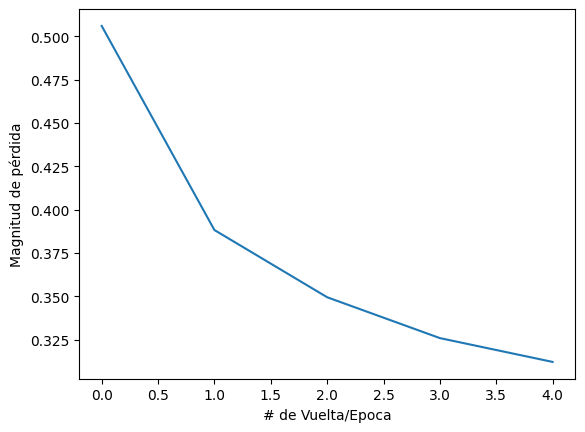

In [25]:
#Ver la funcion de pérdida
plt.xlabel("# de Vuelta/Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

1/1 [==============================] - 0s 62ms/step


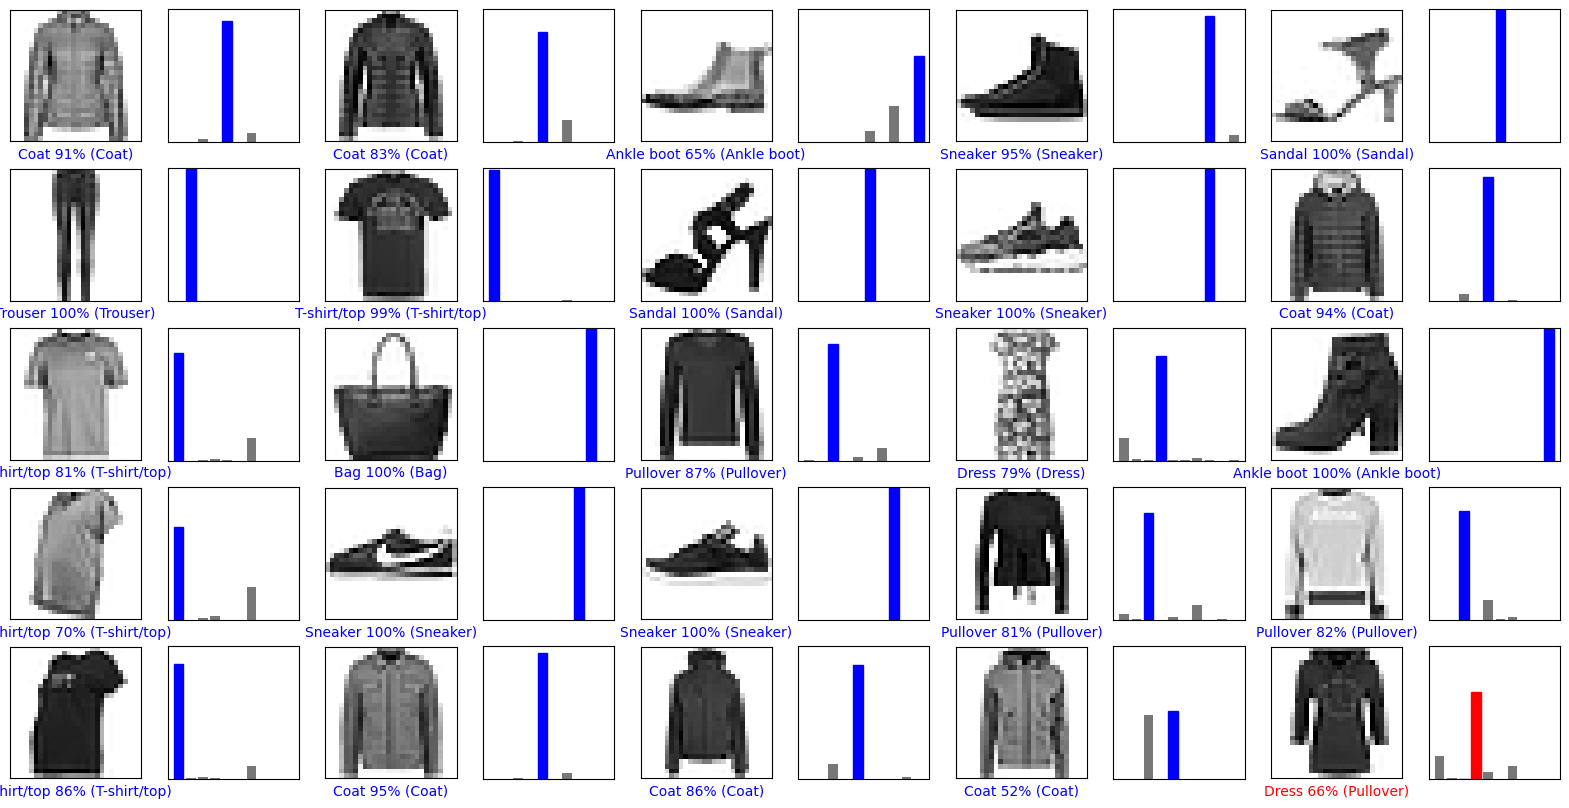

In [65]:
#Pintar una cuadricula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja)
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1])
  etiqueta_prediccion = np.argmax(arr_predicciones)

  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')

filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

In [72]:
#Probar una imagen suelta
imagen=imagenes_prueba[4] #Al ser la variable imagenes_prueba solo tiene lo que se le puso en el bloque anterior
imagen = np.array ([imagen])
prediccion = modelo.predict(imagen)

print("predicción: " + nombres_clases[np.argmax(prediccion[0])])

1/1 [==============================] - 0s 24ms/step
predicción: Sandal


#¡Listo! Bye 👋

In [ ]:
]